# Emotion Detection Project

## Importing required libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
matplotlib.rcParams.update({'font.size': 22})

ModuleNotFoundError: No module named 'plotly'

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/gr33n/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gr33n/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gr33n/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading the dataset and EDA

In [11]:
dataset = pd.read_csv("../ml/data/external/ISEAR_dataset.csv", header=None)
dataset[2][6]

'I feel guilty when when I realize that I consider material things  \nmore important than caring for my relatives.  I feel very  \nself-centered.'

In [12]:
# Dropping the 1st column
dataset_modified = dataset.drop(columns=[0], axis=1)

# Adding column_names to the dataframe
dataset_modified.columns = ['emotion', 'sentences']

In [13]:
# Information on the dataset
dataset_modified.info()

# About 7500 samples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7446 entries, 0 to 7445
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   emotion    7446 non-null   object
 1   sentences  7446 non-null   object
dtypes: object(2)
memory usage: 116.5+ KB


In [14]:
# count of each emotion; check for imbalanced dataset.
dataset_modified['emotion'].value_counts()

# Seems balanced

joy        1082
sadness    1074
anger      1069
fear       1063
disgust    1059
shame      1059
guilt      1040
Name: emotion, dtype: int64

In [15]:
# checking missing values
dataset_modified.isnull().sum()

# No null values

emotion      0
sentences    0
dtype: int64

## Visualization

In [18]:
# def get_top_n_words(corpus, n=None):
#     vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]


In [19]:
# common_words = get_top_n_words(dataset_modified['preprocessed_sentences'], 20)
# for word, freq in common_words:
#     print(word, freq)
# df1 = pd.DataFrame(common_words, columns = ['Sentences' , 'count'])
# plt.figure(figsize=(15,10))
# df1.groupby('Sentences').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar')

# plt.xlabel('Processed_word_bigram')
# plt.xticks(rotation=-45)
# plt.savefig('Bigram_preprocessed__word_count.png')
# plt.show()

## Preprocessing the sentences (An alternative option)

```Trying with 5 emotions```

There are 7 unique emotions present in the dataset, ```joy, sadness, anger, fear, digust, shame, and guilt```Since, the client stated to have 5 emotions. Let's replace ```shame``` with ```fear``` and ```guilt``` with ```sadness```.


In [20]:
dataset_modified['new_emotion'] = dataset_modified['emotion'].replace({'shame': 'fear',
                                                     'guilt':'sadness'})

Text(0, 0.5, 'Counts')

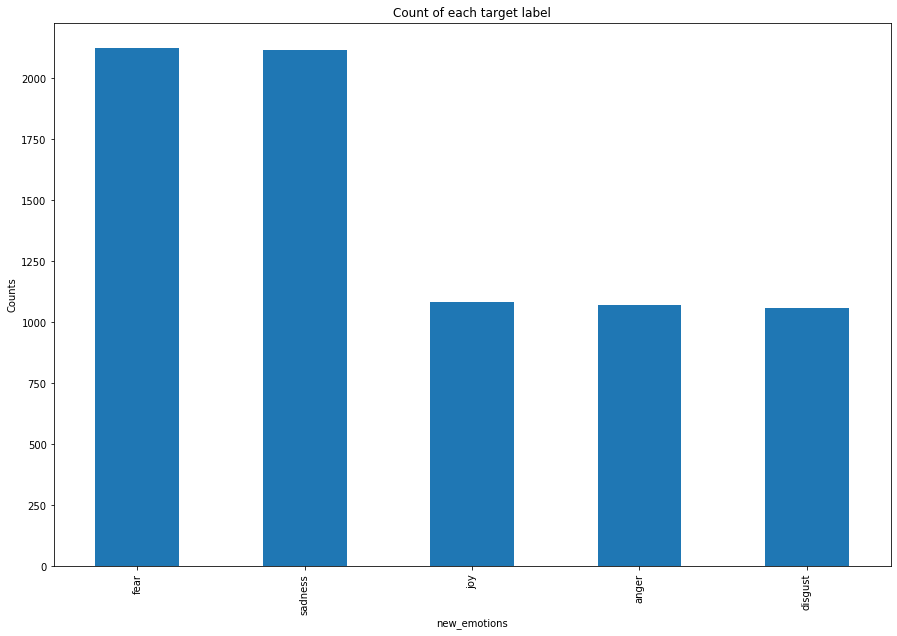

In [21]:
plt.figure(figsize=(15,10))
dataset_modified['new_emotion'].value_counts().plot(kind='bar')
plt.title('Count of each target label')
plt.xlabel('new_emotions')
plt.ylabel('Counts')

In [22]:
dataset_modified['sentences'][1]

'Every time I imagine that someone I love or I could contact a  \nserious illness, even death.'

### Converting into lowercase.

Converting to lowercase is important as ```On``` is different from ```on``` for computers but not us humans. Just for keeping the original columns, let's make a copy of the sentences column.

__Note__: This also removes the ```\n``` or ```enters``` in the sentences.

In [23]:
dataset_modified['preprocessed_sentences'] = dataset_modified['sentences']

In [24]:
# converting to lower case.
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'].apply(lambda x: ' '.join\
                                        (x.lower() for x in x.split()))

In [25]:
dataset_modified['preprocessed_sentences'][1]

'every time i imagine that someone i love or i could contact a serious illness, even death.'

### Removing non-alphanumeric portions

```. and ,``` is present in the sentences. Removing them.

In [26]:
# removing symbols
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                                .str.replace('.', '')
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                                .str.replace(',', ' ')

## Tokenization

Converting the sentences in token of words through, which words are identified, seperated and classified. This also allows easier accesibility for later preprocessing.

In [27]:
from nltk.tokenize import word_tokenize

In [28]:
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                                .apply(word_tokenize)

In [29]:
dataset_modified['preprocessed_sentences'][1]

['every',
 'time',
 'i',
 'imagine',
 'that',
 'someone',
 'i',
 'love',
 'or',
 'i',
 'could',
 'contact',
 'a',
 'serious',
 'illness',
 'even',
 'death']

## Removing Stop Words

Frequently occuring words such as articles ```I, you```  and some verbs might help in finding the context of the sentence. Removing them mightn't have any negative consequences.

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [31]:
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                                .apply(lambda x: [token for token in x if token not in stop_words])

In [32]:
dataset_modified['preprocessed_sentences'][1]

['every',
 'time',
 'imagine',
 'someone',
 'love',
 'could',
 'contact',
 'serious',
 'illness',
 'even',
 'death']

### Lemmatization for word normalization

Converting verbs into base form.

In [33]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [34]:
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'] \
                                            .apply(lambda x: [lemmatizer.lemmatize(token, pos ="s") for token in x])

In [35]:
dataset_modified['preprocessed_sentences'][2]

['obviously', 'unjustly', 'treated', 'possibility', 'elucidating']

In [36]:
print("rocks :", lemmatizer.lemmatize("better", pos ="a")) 

rocks : good


In [37]:
dataset_modified['preprocessed_sentences'] = dataset_modified['preprocessed_sentences'].apply(lambda x: ' '.join(x))

### Label encoding the target emotions

In [38]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

In [39]:
dataset_modified['target'] = encoder.fit_transform(np.array(dataset_modified['new_emotion']).reshape(-1,1))

In [40]:
dataset_modified['polarity'] = dataset_modified['sentences'].map(lambda text: TextBlob(text).sentiment.polarity)
dataset_modified['review_len'] = dataset_modified['sentences'].astype(str).apply(len)
dataset_modified['word_count'] = dataset_modified['sentences'].apply(lambda x: len(str(x).split()))

NameError: name 'TextBlob' is not defined

In [ ]:
dataset_modified[dataset_modified['review_len']==50]['sentences'][26]

In [ ]:
plt.figure(figsize=(15,10))
dataset_modified['polarity'].plot(
    kind='hist',
    bins=50)
plt.xlabel('sentiment level')
plt.savefig('sentiment_level.png')
plt.show()


In [41]:
plt.figure(figsize=(15,10))
dataset_modified['review_len'].plot(
    kind='hist',
    bins=100)
plt.xlabel('Document_length')
plt.savefig('Review_length.png')
plt.show()


KeyError: 'review_len'

<Figure size 1080x720 with 0 Axes>

In [42]:
plt.figure(figsize=(15,10))
dataset_modified['word_count'].plot(
    kind='hist',
    bins=100)
plt.xlabel('Word_count')
plt.savefig('word.png')
plt.show()


KeyError: 'word_count'

<Figure size 1080x720 with 0 Axes>

## Baseline model training step(Count Vectorizer with Naive bayes)


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support

naive_bayes_model = Pipeline([('count_vectorizer', CountVectorizer(ngram_range=(1,2))), ('bayes', LogisticRegression(penalty='l1', solver='liblinear'))])

### Train_test_split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_modified['preprocessed_sentences'], 
                                                    dataset_modified['target'], 
                                                    test_size=0.2)

count_vector = CountVectorizer(ngram_range=(1,2))

In [45]:
naive_bayes_model.fit(X_train, y_train)

/home/gr33n/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('bayes',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
            

In [46]:
test_label = naive_bayes_model.predict(X_test)
train_label = naive_bayes_model.predict(X_train)

In [47]:
from sklearn import metrics
print('*'*25 + 'Training' + '*'*25)
print(metrics.classification_report(y_train, train_label, digits=3))
print('*'*25 + 'Testing' + '*'*25)
print(metrics.classification_report(y_test, test_label, digits=3))


*************************Training*************************
              precision    recall  f1-score   support

         0.0      0.840     0.739     0.787       852
         1.0      0.887     0.754     0.815       839
         2.0      0.809     0.870     0.838      1694
         3.0      0.878     0.839     0.858       866
         4.0      0.807     0.872     0.838      1705

    accuracy                          0.831      5956
   macro avg      0.844     0.815     0.827      5956
weighted avg      0.834     0.831     0.830      5956

*************************Testing*************************
              precision    recall  f1-score   support

         0.0      0.500     0.364     0.421       217
         1.0      0.674     0.536     0.597       220
         2.0      0.585     0.666     0.623       428
         3.0      0.686     0.699     0.693       216
         4.0      0.582     0.641     0.610       409

    accuracy                          0.601      1490
   macro avg  

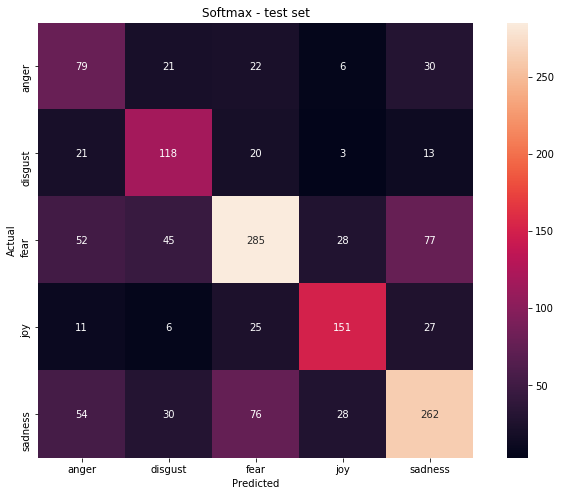

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
confusion_mat_test = confusion_matrix(y_test, test_label)

plt.figure(figsize=(12,8))
ax = sns.heatmap(confusion_mat_test.T, square=True, annot=True, fmt='d', cbar=True)
ax.set_xticklabels(list(encoder.categories_[0]))
ax.set_yticklabels(list(encoder.categories_[0]))
plt.title('Softmax - test set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('_test_heatmap.png')


In [61]:
score = precision_recall_fscore_support(y_test, test_label)
score
classification_score = metrics.classification_report(y_test, test_label, digits=3, output_dict=True)
classification_score['weighted avg']

{'f1-score': 0.5963790351524692,
 'precision': 0.5997976984879676,
 'recall': 0.6006711409395973,
 'support': 1490}

In [73]:
count1 = count_vector.fit_transform(dataset_modified['preprocessed_sentences']).toarray()

In [74]:
count = count_vector.get_feature_names()

In [75]:
count1.shape

(7446, 60025)

friend mine 173
felt guilty 134
one day 132
long time 95
close friend 92
first time 91
felt ashamed 85
felt sad 69
one night 63
passed away 57
years old 56
best friend 54
good friend 51
secondary school 51
felt disgusted 45
years ago 41
car accident 39
got angry 36
made feel 35
next day 34


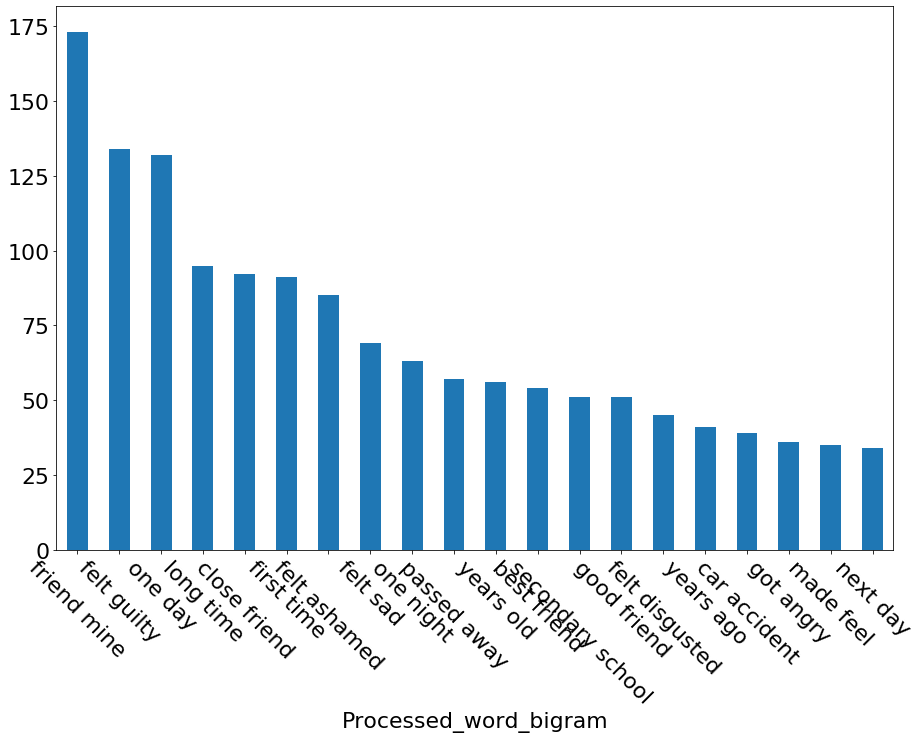